In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('bmh')

In [2]:
## Calcul de la reponse d'un systeme lineaire
## par la methode de l'interpolation de l'excitation (Chopra p.159)
## 
## interval de temps: dt
dt=1/2
## 
## nb de points: nb
nb=20
t = np.arange(0,nb)*dt
# t=0:dt:(nb-1)*dt
## 
## temps de montee: Tr
Tr=1.5

In [3]:
## vecteur de force: F
F=np.ones(nb)
for I in range(int(Tr/dt)):
	F[I]=(I+1)*dt/Tr
## 
## amortissement: z
z=0.0/100
## 
## frequence propre: f
f=1.0
## pulsation propre: w
w=2*np.pi*f

In [4]:
## ****************************************************************
## Calcul des coefficients A,B,C,D,Ap,Bp,Cp,Dp
## ****************************************************************
## 
## calculs preliminaires
e=np.exp(-z*w*dt)
wd=w*np.sqrt(1-z**2)
wdt=wd*dt
Rz=np.sqrt(1-z**2)
## 
A=e*(z/Rz*np.sin(wdt)+np.cos(wdt))
B=e/wd*np.sin(wdt)
C=1/w**2*(2*z/w/dt+e*(((1-2*z**2)/wdt-z/Rz)*np.sin(wdt)-(1+2*z/w/dt)*np.cos(wdt)))
D=1/w**2*(1-2*z/(w*dt)+e*((2*z**2-1)/wdt*np.sin(wdt)+2*z/w/dt*np.cos(wdt)))
Ap=-e*(w/Rz*np.sin(wdt))
Bp=e*(np.cos(wdt)-z/Rz*np.sin(wdt))
Cp=1/w**2*(-1/dt+e*((w/Rz+z/dt/Rz)*np.sin(wdt)+1/dt*np.cos(wdt)))
Dp=1/w**2/dt*(1-e*(z/Rz*np.sin(wdt)+np.cos(wdt)))

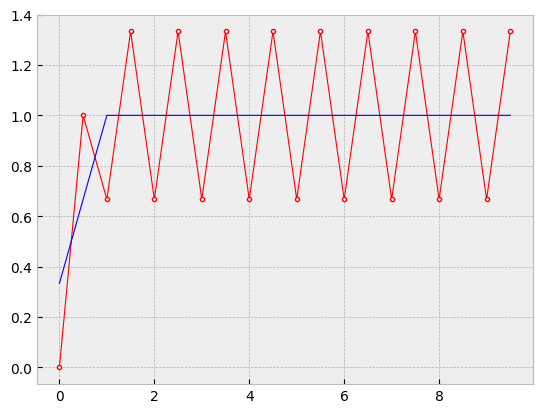

In [5]:
## ****************************************************************
## Calcul des deplacements et des vitesses
## ****************************************************************
## 
u = np.zeros(nb)
v = np.zeros(nb)
## 
for I in range(nb-1):
	u[I+1]=A*u[I]+B*v[I]+C*F[I]+D*F[I+1]
	v[I+1]=Ap*u[I]+Bp*v[I]+Cp*F[I]+Dp*F[I+1]
## 
## dessin de la reponse
plt.plot(t,u*w**2,'-or',t,F, 'b', ms=3, mfc='w', linewidth=0.8)
plt.show()